##Build the model which will predict the profit that a startup company can have when Administration amount, R&D spend amount marketing amount along with the state of organization is specified.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("50_Startups (1).csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#Outlire
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

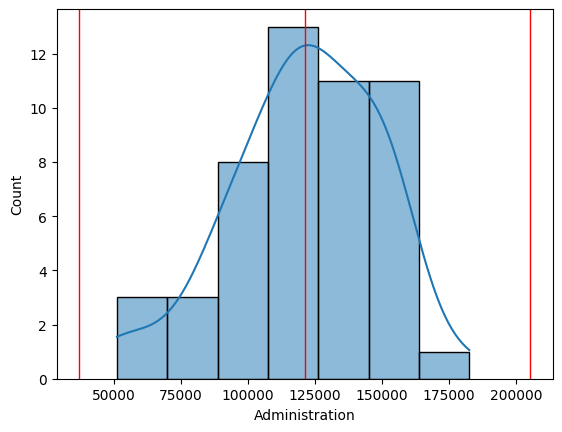

In [13]:
mean = data['Administration'].mean()
std = data['Administration'].std()
sns.histplot(data['Administration'],kde=True)
plt.axvline(mean,color="red",linewidth=1)
plt.axvline(mean -3*std,color="red",linewidth=1)
plt.axvline(mean +3*std,color="red",linewidth=1)

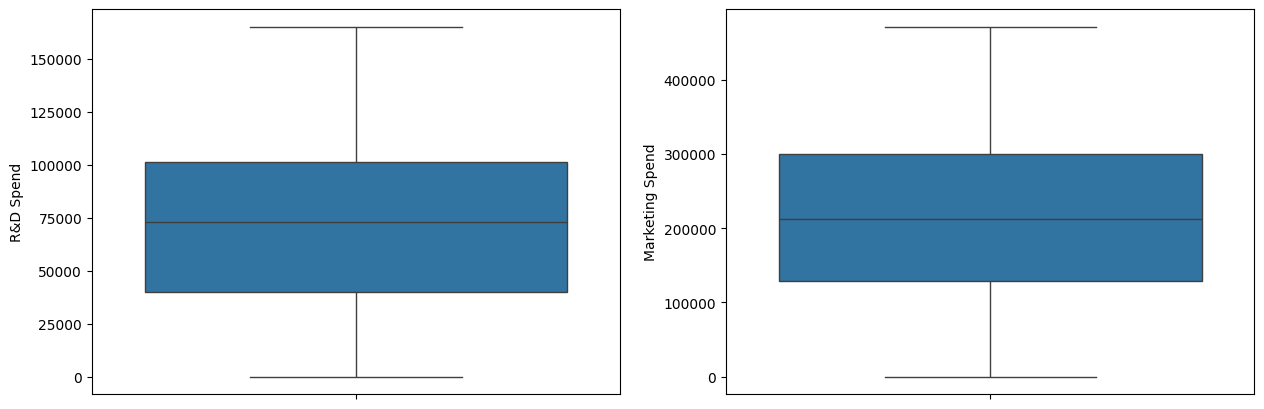

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data['R&D Spend'])
plt.subplot(1,2,2)
sns.boxplot(data['Marketing Spend'])
plt.show()

In [23]:
Q1 = data['Marketing Spend'].quantile(0.1)
print("Q1:",Q1)
Q3 = data['Marketing Spend'].quantile(0.75)
print("Q3:",Q3)
IQR = Q3-Q1
print("IQR:",IQR)
lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR 
print("Lower:",lower)
print("Upper:",upper)
data[(data['Marketing Spend']<lower) | (data['Marketing Spend']>upper)]

Q1: 34814.225
Q3: 299469.08499999996
IQR: 264654.86
Lower: -362168.065
Upper: 696451.375


,R&D Spend,Administration,Marketing Spend,State,Profit


In [7]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
data = pd.get_dummies(data,columns = ['State'],dtype="int")

In [9]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
X = data.drop("Profit",axis=1)
y = data['Profit']

In [11]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=29)

In [15]:
x_train.shape

(40, 6)

In [16]:
x_test

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
35,46014.02,85047.44,205517.64,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
45,1000.23,124153.04,1903.93,0,0,1
48,542.05,51743.15,0.00,0,0,1
22,73994.56,122782.75,303319.26,0,1,0
17,94657.16,145077.58,282574.31,0,0,1
36,28663.76,127056.21,201126.82,0,1,0
47,0.00,135426.92,0.00,1,0,0
9,123334.88,108679.17,304981.62,1,0,0
1,162597.70,151377.59,443898.53,1,0,0


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  #Create model

In [18]:
lr.fit(x_train,y_train) #Train Model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
lr.coef_

array([ 8.40900177e-01, -6.43072959e-02,  1.91039773e-02,  6.80106880e+02,
       -2.43140398e+02, -4.36966482e+02])

In [20]:
lr.intercept_

np.float64(53606.29657847604)

In [21]:
data.iloc[1]

R&D Spend           162597.70
Administration      151377.59
Marketing Spend     443898.53
Profit              191792.06
State_California         1.00
State_Florida            0.00
State_New York           0.00
Name: 1, dtype: float64

In [23]:
lr.predict([[ 162597.70,151377.59,443898.53,1.00,0.00,0.00]])   #Predict profit for one of the input

C:\Users\Vaishali Kanadje\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([189760.3820631])

In [24]:
train_pred = lr.predict(x_train)  #Predicted value for training data

In [25]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error

In [26]:
mean_squared_error(y_train,train_pred)

74642163.33896443

In [27]:
root_mean_squared_error(y_train,train_pred)

8639.569626952747

In [28]:
from sklearn.metrics import r2_score

In [29]:
test_pred = lr.predict(x_test)   #Predicted value for test data

In [30]:
r2_score(y_test,test_pred)   #Check Accuracy

0.9500997612789298

##Deployment Example

In [31]:
def decidestate(state):
    if (state== "New York"):
        cal = 0
        flo = 0
        ny = 1
    elif (state== "California"):
        cal = 1
        flo = 0
        ny = 0
    else:
        cal = 0
        flo = 1
        ny = 0
    return cal,flo,ny

In [33]:
def calProfit(rnd,adm,mrk,cal,flo,ny):
    pred_profit = lr.intercept_ + lr.coef_[0]*rnd +lr.coef_[1]*adm+lr.coef_[2]*mrk+lr.coef_[3]*cal+lr.coef_[4]*flo+lr.coef_[5]*ny
    return pred_profit

In [36]:
rnd = int(input("Enter R&D spend:"))
adm = int(input("Enter Administration:"))
mrk = int(input("Enter Marketing Spend:"))
state = input("Enter State: ")
cal,flo,ny = decidestate(state)
print(calProfit(rnd,adm,mrk,cal,flo,ny))

Enter R&D spend: 162597
Enter Administration:  151377
Enter Marketing Spend: 443898
Enter State:  California


189759.82124917014
